In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
from MCForecastTools import MCSimulation
%matplotlib inline

In [2]:
#apple_csv = Path("..data/csv_files/Apple.csv")
apple_df = pd.read_csv("../data/clean/Apple.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

facebook_df = pd.read_csv("../data/clean/Facebook.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

google_df = pd.read_csv("../data/clean/Google.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

netflix_df = pd.read_csv("../data/clean/Netflix.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

amazon_df = pd.read_csv("../data/clean/Amazon.csv", index_col= "Date", parse_dates=True, infer_datetime_format=True)

In [3]:
apple_df.rename(columns={"Close":"AAPL"}, inplace=True)

google_df.rename(columns={"Close":"GOOGL"}, inplace=True)

netflix_df.rename(columns={"Close":"NFLX"}, inplace=True)

facebook_df.rename(columns={"Close":"FB"}, inplace=True)

amazon_df.rename(columns={"Close":"AMZN"}, inplace=True)

In [4]:
apple_df.head()

,AAPL
Date,
2019-10-29,60.82
2019-10-30,60.82
2019-10-31,62.19
2019-11-01,63.96
2019-11-04,64.38


In [5]:
daily_prices = pd.concat([facebook_df, apple_df, amazon_df, netflix_df, google_df], axis="columns", join="inner")

daily_prices.sort_index(inplace=True)
daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-29,189.31,60.82,1762.71,281.21,1260.66
2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2019-10-31,191.65,62.19,1776.66,287.41,1258.80
2019-11-01,193.62,63.96,1791.44,286.81,1272.25
2019-11-04,194.72,64.38,1804.66,292.86,1289.61


In [6]:
#daily prices for FAANG Stocks
daily_prices.reset_index()

,Date,FB,AAPL,AMZN,NFLX,GOOGL
0,2019-10-29,189.31,60.82,1762.71,281.21,1260.66
1,2019-10-30,188.25,60.82,1779.99,291.45,1260.70
2,2019-10-31,191.65,62.19,1776.66,287.41,1258.80
3,2019-11-01,193.62,63.96,1791.44,286.81,1272.25
4,2019-11-04,194.72,64.38,1804.66,292.86,1289.61
...,...,...,...,...,...,...
248,2020-10-22,278.12,115.75,3176.40,485.23,1606.66
249,2020-10-23,284.79,115.04,3204.40,488.28,1632.98
250,2020-10-26,277.11,115.05,3207.04,488.24,1584.29
251,2020-10-27,283.29,116.60,3286.33,488.93,1598.88


In [133]:
none = daily_prices.reset_index()

fang_to_merge = none.set_index("Date")

fang_to_merge["Sum"] = fang_to_merge.sum(axis=1)
sum_fang = fang_to_merge.drop(["FB", "AAPL", "AMZN", "NFLX", "GOOGL"], axis=1)
sum_fang.to_csv("../data/clean/fang_sum.csv")

In [7]:
#Changing Prices to Daily Return Changes
daily_price_change = daily_prices.pct_change()
changes_daily_prices = daily_price_change.dropna()
changes_daily_prices.head()

,FB,AAPL,AMZN,NFLX,GOOGL
Date,,,,,
2019-10-30,-0.005599,0.000000,0.009803,0.036414,0.000032
2019-10-31,0.018061,0.022525,-0.001871,-0.013862,-0.001507
2019-11-01,0.010279,0.028461,0.008319,-0.002088,0.010685
2019-11-04,0.005681,0.006567,0.007380,0.021094,0.013645
2019-11-05,-0.002054,-0.001553,-0.001635,-0.016493,0.001419


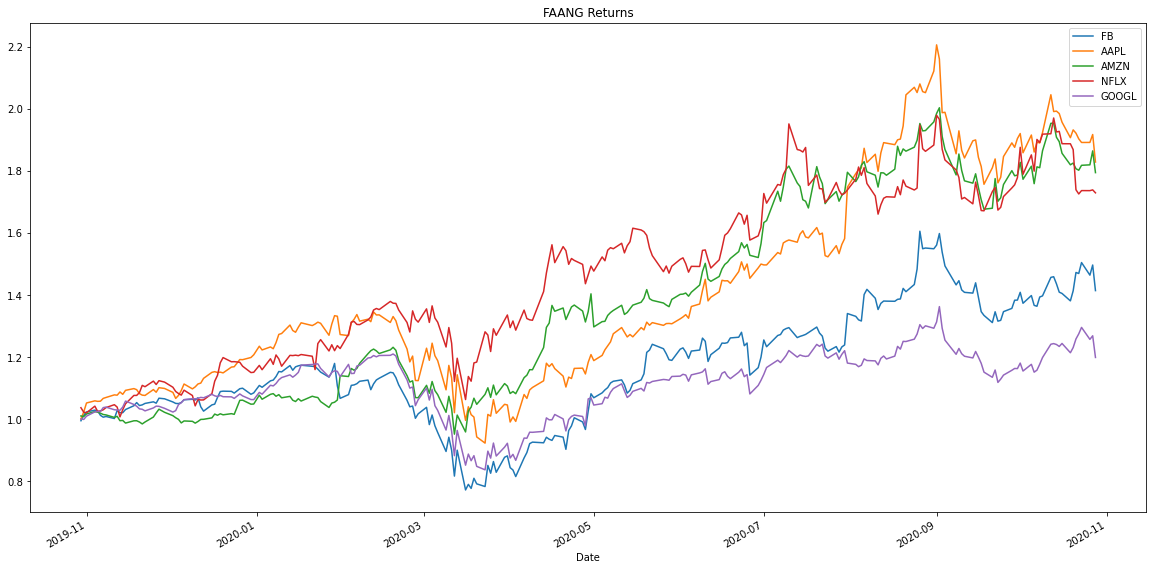

In [8]:
returns_faang = (1 + changes_daily_prices).cumprod()
returns_faang.plot(figsize = (20,10), title="FAANG Returns")

In [9]:
standard_dev = returns_faang.std()
standard_dev

FB       0.184986
AAPL     0.326597
AMZN     0.329905
NFLX     0.275714
GOOGL    0.102088
dtype: float64

In [10]:
annual_sd = standard_dev * np.sqrt(252)
annual_sd

FB       2.936568
AAPL     5.184569
AMZN     5.237081
NFLX     4.376824
GOOGL    1.620593
dtype: float64

In [11]:
weights = [.2, .2, .2, .2, .2]

portfolio_returns = returns_faang.dot(weights)

portfolio_returns.head()

Date
2019-10-30    1.008130
2019-10-31    1.012674
2019-11-01    1.023960
2019-11-04    1.035060
2019-11-05    1.030829
dtype: float64

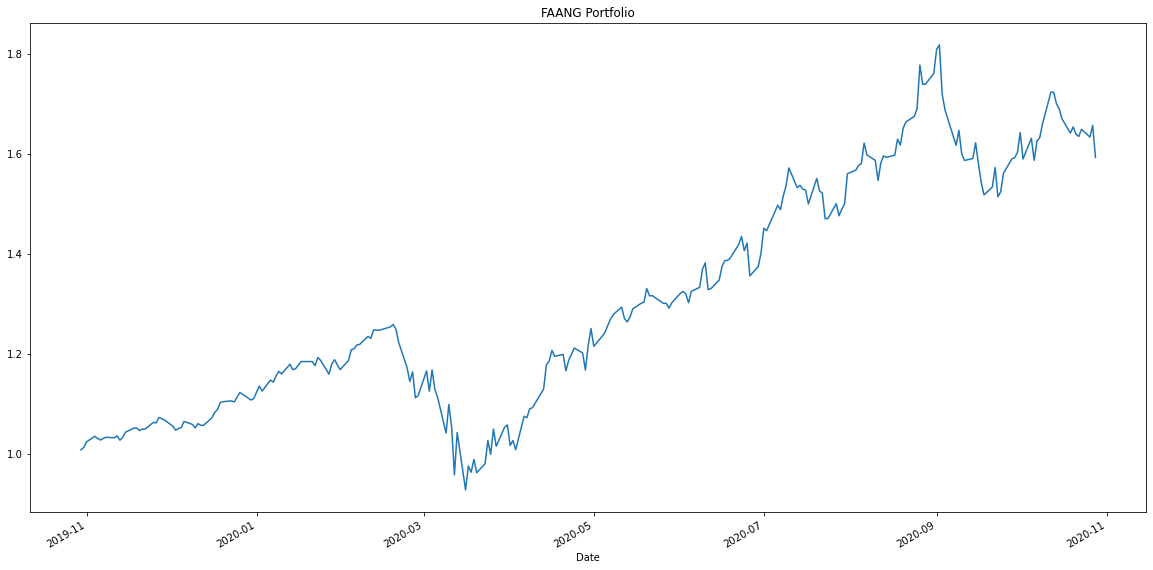

In [12]:
portfolio_returns.plot(figsize = (20,10), title="FAANG Portfolio")

In [13]:
faang_df = pd.DataFrame(portfolio_returns, columns=["FAANG"])



In [14]:
faang_price_changes = faang_df.pct_change()

faang_asset = faang_price_changes.dropna()

faang_asset.head()

,FAANG
Date,
2019-10-31,0.004508
2019-11-01,0.011144
2019-11-04,0.010840
2019-11-05,-0.004088
2019-11-06,-0.003077


In [15]:
faang_asset.to_csv("../data/clean/FAANG.csv")

# Play around with Data

In [16]:
bitcoin_path = ("../Data/clean/Bitcoin.csv")
gold_path = ("../Data/clean/Gold.csv")
vnq_path = ("../Data/clean/VNQ.csv")
sp500_path = ("../Data/clean/sp500.csv")
faang_path = ("../Data/clean/FAANG.csv")

In [17]:
bitcoin_df = pd.read_csv(bitcoin_path)
gold_df = pd.read_csv(gold_path)
vnq_df = pd.read_csv(vnq_path)
sp500_df = pd.read_csv(sp500_path)
faang_df = pd.read_csv(faang_path)

In [18]:
faang_df

,Date,FAANG
0,2019-10-31,0.004508
1,2019-11-01,0.011144
2,2019-11-04,0.010840
3,2019-11-05,-0.004088
4,2019-11-06,-0.003077
...,...,...
246,2020-10-22,-0.002887
247,2020-10-23,0.008706
248,2020-10-26,-0.009420
249,2020-10-27,0.014342


In [109]:
new_assets = pd.concat([gold_df, sp500_df, vnq_df, bitcoin_df], axis=1, join= "inner")
new_assets

Cols = list(new_assets.columns)

for i, item in enumerate(new_assets.columns):
    if item in new_assets.columns[:i]:Cols[i] = "toDROP"

new_assets.columns = Cols

joining_assets = new_assets.drop("toDROP", 1).set_index("Date").dropna()

non_fang1 = joining_assets.iloc[::-1]
non_fang2 = non_fang1.iloc[11:]

In [114]:
sum_fang.tail()

,Sum
Date,
2020-10-22,5662.16
2020-10-23,5725.49
2020-10-26,5671.73
2020-10-27,5774.03
2020-10-28,5538.69


In [134]:
# prices_assets = pd.merge(non_fang2, sum_fang, how="right", on="Date")l
working = pd.concat([sum_fang, non_fang2], axis="columns", join="outer")
working.to_csv("../data/raw_csv/daily_prices_all_ugly.csv")

In [20]:
joining_assets.sort_values(by=["Date"], inplace=True, ascending=True)


In [21]:
no_bitcoin_assets = joining_assets.pct_change().dropna()
no_bitcoin_assets

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2019-10-17,0.002888,0.005048,0.016295,0.000874
2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
...,...,...,...,...
2020-10-23,0.000315,0.003446,0.017277,0.011122
2020-10-26,0.000262,-0.018590,0.007050,-0.007580
2020-10-27,0.003253,-0.003026,0.000212,-0.008396


In [22]:
no_bitcoin_assets.reset_index()

,Date,GOLD,sp500,VNQ,BITCOIN
0,2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
1,2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2,2019-10-17,0.002888,0.005048,0.016295,0.000874
3,2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
4,2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
...,...,...,...,...,...
272,2020-10-23,0.000315,0.003446,0.017277,0.011122
273,2020-10-26,0.000262,-0.018590,0.007050,-0.007580
274,2020-10-27,0.003253,-0.003026,0.000212,-0.008396
275,2020-10-28,-0.017103,-0.035288,0.001803,0.000579


In [23]:
no_bitcoin_assets.head(15)

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-15,-0.009168,-0.002429,-0.013230,-0.039795
2019-10-16,0.006807,-0.005316,0.024448,-0.020929
2019-10-17,0.002888,0.005048,0.016295,0.000874
2019-10-18,-0.003142,-0.012258,0.014518,-0.017774
2019-10-21,-0.003743,-0.017903,-0.005973,0.010478
2019-10-22,-0.000461,0.007972,0.000125,-0.098913
2019-10-23,0.005473,0.014217,0.003004,-0.022995
2019-10-24,0.005902,-0.004478,-0.007113,-0.016251
2019-10-25,0.000782,-0.015561,0.015837,0.005573


In [24]:
try1_assets = no_bitcoin_assets.drop(no_bitcoin_assets.index[[0,1,2,3,4,5,6,7,8,9,10,11]])

In [25]:
try1_assets

,GOLD,sp500,VNQ,BITCOIN
Date,,,,
2019-10-31,0.011464,-0.001387,0.017443,0.004977
2019-11-01,-0.001749,0.009956,-0.004676,-0.004105
2019-11-04,0.000195,-0.002000,0.000000,-0.001570
2019-11-05,-0.017579,0.002763,0.003975,-0.002239
2019-11-06,0.006207,-0.003919,-0.016437,0.006940
...,...,...,...,...
2020-10-23,0.000315,0.003446,0.017277,0.011122
2020-10-26,0.000262,-0.018590,0.007050,-0.007580
2020-10-27,0.003253,-0.003026,0.000212,-0.008396


In [26]:
assets_class = try1_assets.reset_index()

In [27]:
assets_class

,Date,GOLD,sp500,VNQ,BITCOIN
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940
...,...,...,...,...,...
260,2020-10-23,0.000315,0.003446,0.017277,0.011122
261,2020-10-26,0.000262,-0.018590,0.007050,-0.007580
262,2020-10-27,0.003253,-0.003026,0.000212,-0.008396
263,2020-10-28,-0.017103,-0.035288,0.001803,0.000579


In [28]:
merge_assets = pd.concat([assets_class, faang_df], axis= "columns", join="inner")


In [29]:
merge_assets

,Date,GOLD,sp500,VNQ,BITCOIN,Date,FAANG
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977,2019-10-31,0.004508
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,2019-11-01,0.011144
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570,2019-11-04,0.010840
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239,2019-11-05,-0.004088
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940,2019-11-06,-0.003077
...,...,...,...,...,...,...,...
246,2020-10-05,0.006553,0.017976,-0.003158,-0.001469,2020-10-22,-0.002887
247,2020-10-06,-0.005885,-0.013988,0.003714,-0.002471,2020-10-23,0.008706
248,2020-10-07,-0.009430,0.017406,0.014256,0.021814,2020-10-26,-0.009420
249,2020-10-08,0.002274,0.008007,0.000536,0.014074,2020-10-27,0.014342


In [30]:
Cols = list(merge_assets.columns)

for i, item in enumerate(merge_assets.columns):
    if item in merge_assets.columns[:i]:Cols[i] = "toDROP"

merge_assets.columns = Cols

assets_excluding_bitcoin = merge_assets.drop("toDROP", 1).set_index("Date").dropna()

assets_excluding_bitcoin

,GOLD,sp500,VNQ,BITCOIN,FAANG
Date,,,,,
2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...
2020-10-05,0.006553,0.017976,-0.003158,-0.001469,-0.002887
2020-10-06,-0.005885,-0.013988,0.003714,-0.002471,0.008706
2020-10-07,-0.009430,0.017406,0.014256,0.021814,-0.009420


In [31]:
assets_excluding_bitcoin.to_csv("../data/clean/4Assets.csv")

In [32]:
clean_assets = pd.merge(assets_class, faang_df, how="right", on="Date")
clean_assets

,Date,GOLD,sp500,VNQ,BITCOIN,FAANG
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...,...
246,2020-10-22,-0.012905,0.005219,-0.002168,-0.021083,-0.002887
247,2020-10-23,0.000315,0.003446,0.017277,0.011122,0.008706
248,2020-10-26,0.000262,-0.018590,0.007050,-0.007580,-0.009420
249,2020-10-27,0.003253,-0.003026,0.000212,-0.008396,0.014342


In [33]:
clean_assets.to_csv("../data/clean/Five_Assets.csv")

In [34]:
asset_changes_daily = pd.DataFrame(clean_assets)

In [35]:
asset_changes_daily

,Date,GOLD,sp500,VNQ,BITCOIN,FAANG
0,2019-10-31,0.011464,-0.001387,0.017443,0.004977,0.004508
1,2019-11-01,-0.001749,0.009956,-0.004676,-0.004105,0.011144
2,2019-11-04,0.000195,-0.002000,0.000000,-0.001570,0.010840
3,2019-11-05,-0.017579,0.002763,0.003975,-0.002239,-0.004088
4,2019-11-06,0.006207,-0.003919,-0.016437,0.006940,-0.003077
...,...,...,...,...,...,...
246,2020-10-22,-0.012905,0.005219,-0.002168,-0.021083,-0.002887
247,2020-10-23,0.000315,0.003446,0.017277,0.011122,0.008706
248,2020-10-26,0.000262,-0.018590,0.007050,-0.007580,-0.009420
249,2020-10-27,0.003253,-0.003026,0.000212,-0.008396,0.014342


In [36]:
asset_returns = (1 + asset_changes_daily).cumprod()
asset_returns

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [37]:
asset_returns.plot(figsize = (20,10), title="Asset 1-Year Returns")

NameError: name 'asset_returns' is not defined

In [49]:

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [50]:
assets_project = ["Gold", "sp500", "VNQ", "BITCOIN", "FAANG"]

In [51]:
weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])
weights

array([0.2, 0.2, 0.2, 0.2, 0.2])

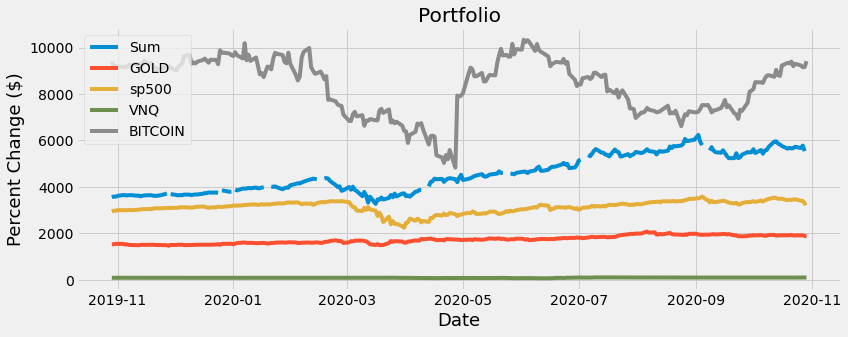

In [116]:
title = "Portfolio"
# created using the daily prices of all assets above
working = working 
#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
# Loop through each stock and plot the Adj Close for each day
for c in working.columns.values:
  plt.plot( working[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Percent Change ($)',fontsize=18)
plt.legend(working.columns.values, loc='upper left')
plt.show()

In [117]:
returns = working.pct_change()

In [118]:
cov_matrix_annual = working.cov() * 252
cov_matrix_annual

,Sum,GOLD,sp500,VNQ,BITCOIN
Sum,1.642580e+08,3.129745e+07,3.061169e+07,1.088826e+06,-3.327145e+07
GOLD,3.129745e+07,6.776496e+06,4.258897e+06,2.026336e+05,-1.733813e+07
sp500,3.061169e+07,4.258897e+06,1.638756e+07,2.886518e+05,1.886641e+07
VNQ,1.088826e+06,2.026336e+05,2.886518e+05,1.987938e+04,-5.594491e+05
BITCOIN,-3.327145e+07,-1.733813e+07,1.886641e+07,-5.594491e+05,3.647008e+08


In [119]:
#Portfolio Vaariance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

24921353.09070804

In [120]:
#Volatility(Standard Deviation)
port_volatility = np.sqrt(port_variance)
port_volatility 

4992.12911398614

In [123]:
#Annual Return
portfolioSimpleAnnualReturn = np.sum(working.mean()*weights) * 252
portfolioSimpleAnnualReturn

900859.7000552473

In [124]:
percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2)*100)+'%'
print("Expected annual return : "+ percent_ret)
print('Annual volatility/standard deviation/risk : '+percent_vols)
print('Annual variance : '+percent_var)

Expected annual return : 90085970.0%
Annual volatility/standard deviation/risk : 499213.0%
Annual variance : 2492135309.0%


In [125]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [127]:
mu = expected_returns.mean_historical_return(working)
S = risk_models.sample_cov(working)

In [128]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe() #Maximize the Sharpe ratio, and get the raw weights
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) #Note the weights may have some rounding error, meaning they may not add up exactly to 1 but should be close
ef.portfolio_performance(verbose=True)

OrderedDict([('Sum', 0.41977), ('GOLD', 0.33994), ('sp500', 0.14522), ('VNQ', 0.08711), ('BITCOIN', 0.00796)])
Expected annual return: 32.3%
Annual volatility: 17.2%
Sharpe Ratio: 1.76


(0.32322388967601745, 0.17204426864551559, 1.7624759723951495)

In [130]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(working)
weights = cleaned_weights 
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=150000)
allocation, leftover = da.lp_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))

Discrete allocation: {'Sum': 11, 'GOLD': 28, 'sp500': 7, 'VNQ': 139}
Funds remaining: $497.37


In [132]:
working.tail()

,Sum,GOLD,sp500,VNQ,BITCOIN
Date,,,,,
2020-10-23,5725.49,1905.20,3465.39,93.62,9300.6
2020-10-26,5671.73,1905.70,3400.97,94.28,9230.1
2020-10-27,5774.03,1911.90,3390.68,94.30,9152.6
2020-10-28,5538.69,1879.20,3271.03,94.47,9157.9
2020-10-29,NaN,1868.65,3310.11,94.13,9411.3
